##  Step 2 : Plot and Select Mineral Resources

Machine learning algorithm requires data to train the model. In this notebook, we are going to select some mineral deposits which we are interested in. And then these chosen deposits will be used as input in Step 3 to retrieve more attributes from the trench sample points. After that, in Step 4, we can format the data so that they are ready to be fed into the machine learning models in Step 5.

Now let's select some interesting mineral deposits and prepare the data for the next step. The Step 3 takes a csv file as input. The csv file should has five columns. 

* index
* lon
* lat
* age
* plate id

The ultimate goal of this step is to produce the csv file with the above five columns. There are many ways to get data and prepare the csv file. We are going to show you some examples below. After you have gone through the examples, you should have learnt how to create the csv file. And you are encouraged to come up with your own novel ways to find and process data, for example hack into KGB database, ect. Remember, only the final csv file matters. Focus on the five columns inside the csv file.

---

#### Example 1: Use ../data/CopperDeposits/XYBer14_t2_ANDES.shp data

This is the simplest example. 

We just load in data from a shape file and write out the five-column data to a csv file.

Run the script to create an example coregistration input file for XYBer14_t2_ANDES.shp dataset.

The coregistration input file can be used later in step 3: coregistration.

##### The implementation details are in create_coregistration_input_data_example.py.
If you would like to know more magic behind the scene, open [create_coregistration_input_data_example.py](create_coregistration_input_data_example.py)

In [64]:
import pandas as pd
import create_coregistration_input_data_example

#create the csv file
create_coregistration_input_data_example.run_it()

#open and display the final csv file
data = pd.read_csv("coregistration_input_data_example.csv", 
                   header=None, names=['index', 'lon', 'lat', 'age', 'plate id']) 
data.head()#let's print the first 5 rows

The data have been written into coregistration_input_data_example.csv successfully!


,index,lon,lat,age,plate id
0,0,-66.28,-27.37,6,201
1,1,-69.37,-31.30,230,201
2,2,-69.75,-30.50,12,201
3,3,-66.65,-27.27,9,201
4,4,-66.61,-27.33,8,201


Now, let's plot a map to see the trench and copper deposits in Andes.

Since the deposits are all in Andes, draw the map with extent "-85, -30, -55, 15"(South America). The deposits are coloured by their ages.

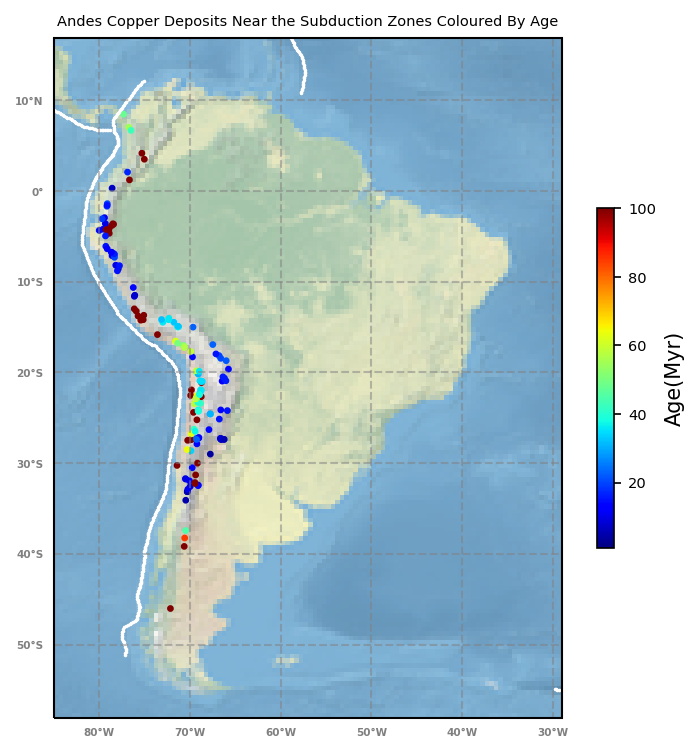

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

trench_file = './convergence_data/subStats_0.00.csv'
trench_data= np.genfromtxt(trench_file)

fig = plt.figure(figsize=(6,6),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-85, -29, -55, 15])
#ax.set_extent([-180, 180, -90, 90])
data=data[:155]

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -80, -70, -60,-50,-40,-30, 0, 180])
gl.ylocator = mticker.FixedLocator([-90,-50,-40, -30, -20,-10, 0, 10, 20, 30, 40,50, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'gray', 'weight': 'bold', 'fontsize': '5'}
gl.ylabel_style = {'color': 'gray', 'weight': 'bold', 'fontsize': '5'}

cb = ax.scatter(data['lon'], data['lat'], 20, marker='.',c=data['age'], vmin=1, vmax=100, cmap=plt.cm.jet)
ax.scatter(trench_data[:,0], trench_data[:,1], 2, marker='.', color='white')# draw the trench in white
plt.title('Andes Copper Deposits Near the Subduction Zones Coloured By Age',fontsize=7)
cbar = fig.colorbar(cb, shrink=0.5)
cbar.set_label('Age(Myr)',size=10)
cbar.ax.tick_params(labelsize=7)
plt.show()

#### Example 2: Extract Data From EarthChem Data

After generating the subduction convergence kinematics statistics, the sample points of trenches can be used to extract data from EarthChem data.

    Example: python extract_earth_chem.py EarthChem_all.csv output CU 5
    
This command line will extract data from locations which are within 5 degrees of a trench sample point and with a variable name CU. A shafefile(output.shp) and a csv file(output.csv) will be created for the extracted data.

For more information about the usage of extract_earth_chem.py, run "python extract_earth_chem.py -h" in a shell.

The EarthChem_all.csv can be found here https://www.earthbyte.org/webdav/ftp/earthbyte/EarthChem/EarthChem_all.csv.

The following code cell will call extract_earth_chem.py and draw the deposits on a map.

#### Mineral Symbols (TODO: too many symbols here, need to choose a few with a short description what they are)
* SIO2,U234_U238,TIO2,AL2O3,FE2O3,TH230_TH232,FE2O3T,TH232_TH230,FEO,FEOT,MGO,RA228_RA226,CAO,NA2O,K2O,
* P2O5,MNO,U238_ACTIVITY,LOI,H2O_PLUS,TH230,H2O_MINUS,H2O,RA226,CR2O3,NIO,LA,CE,CACO3,PR,SM,EU,GD,TB,DY,
* HO,ER,TM,YB,U234_U238_ACTIVITY,LU,LI,BE,B,C,CO2,F,CL,K,CA,MG,SC,TI,V,FE,CR,MN,CO,NI,CU,ZN,GA,ZR,GER,SR,
* K40_AR36,BI,OS187_OS188,NB,TH232_U238,PB208_PB206,CD,PO210_TH230,U238_PB204,BA,AR40_AR36,W,AR37_AR39,AU,
* XE129_XE132,LU176_HF177,HG,OS186_OS188,PB206_PB208,TA,PB210_U238,SB,SR87_SR86,SE,PB207_PB204,PB206_PB204,
* PB208_PB204,SN,S,TH230_U238,ND143_ND144,U,RA226_TH230,I,P,Y,EPSILON_ND,MO,OS184_OS188,PD,RA226_TH228,TE,
* TH232_PB204,HF,OS187_OS186,CL36_CL,RA228_TH232,PB206_PB207,PB,INDIUM,H,PB210_RA226,AR38_AR36,AR40_AR39,D18O,
* AG,TH,U235_PB204,NE21_NE22,TL,NE20_NE22,AS,HF176_HF177,RB,AL,BE10_BE9,AR36_AR39,ND,CS,quartz

In [66]:
%matplotlib inline

import requests, os
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import extract_earth_chem

earth_chem_file = 'EarthChem_all.csv'
#if EarthChem_all.csv does not exist, download it.
if not os.path.isfile(earth_chem_file):
    if os.path.isfile('/data/EarthChem_all.csv'):
        earth_chem_file = '/data/EarthChem_all.csv'
    else:
        print(f'downloading {earth_chem_file}')
        myfile = requests.get('https://www.earthbyte.org/webdav/ftp/earthbyte/EarthChem/EarthChem_all.csv')
        open(earth_chem_file, 'wb').write(myfile.content)

#select data from EarthChem dataset
extract_earth_chem.main(
    earth_chem_file, #input file
    'EarthChem_CU', #output file
    'CU', #mineral symbol, see above list
    5 #region of interest (in degrees)
)

data=np.genfromtxt('EarthChem_CU.csv', delimiter=',', skip_header=1)
trench_file = './convergence_data/subStats_0.00.csv'
if os.path.isfile(trench_file):
    trench_data= np.genfromtxt(trench_file)
else:
    raise Exception(f'\nERROR: unable to open file {trench_file}. \nRun Step 1 Generate Subduction Convergence Kinematics Statistics first!')
    
print('done!')

loading data...


/home/mchin/anaconda3/envs/machine_learning/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (2,5,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


query data...
44160
saving file...
done!


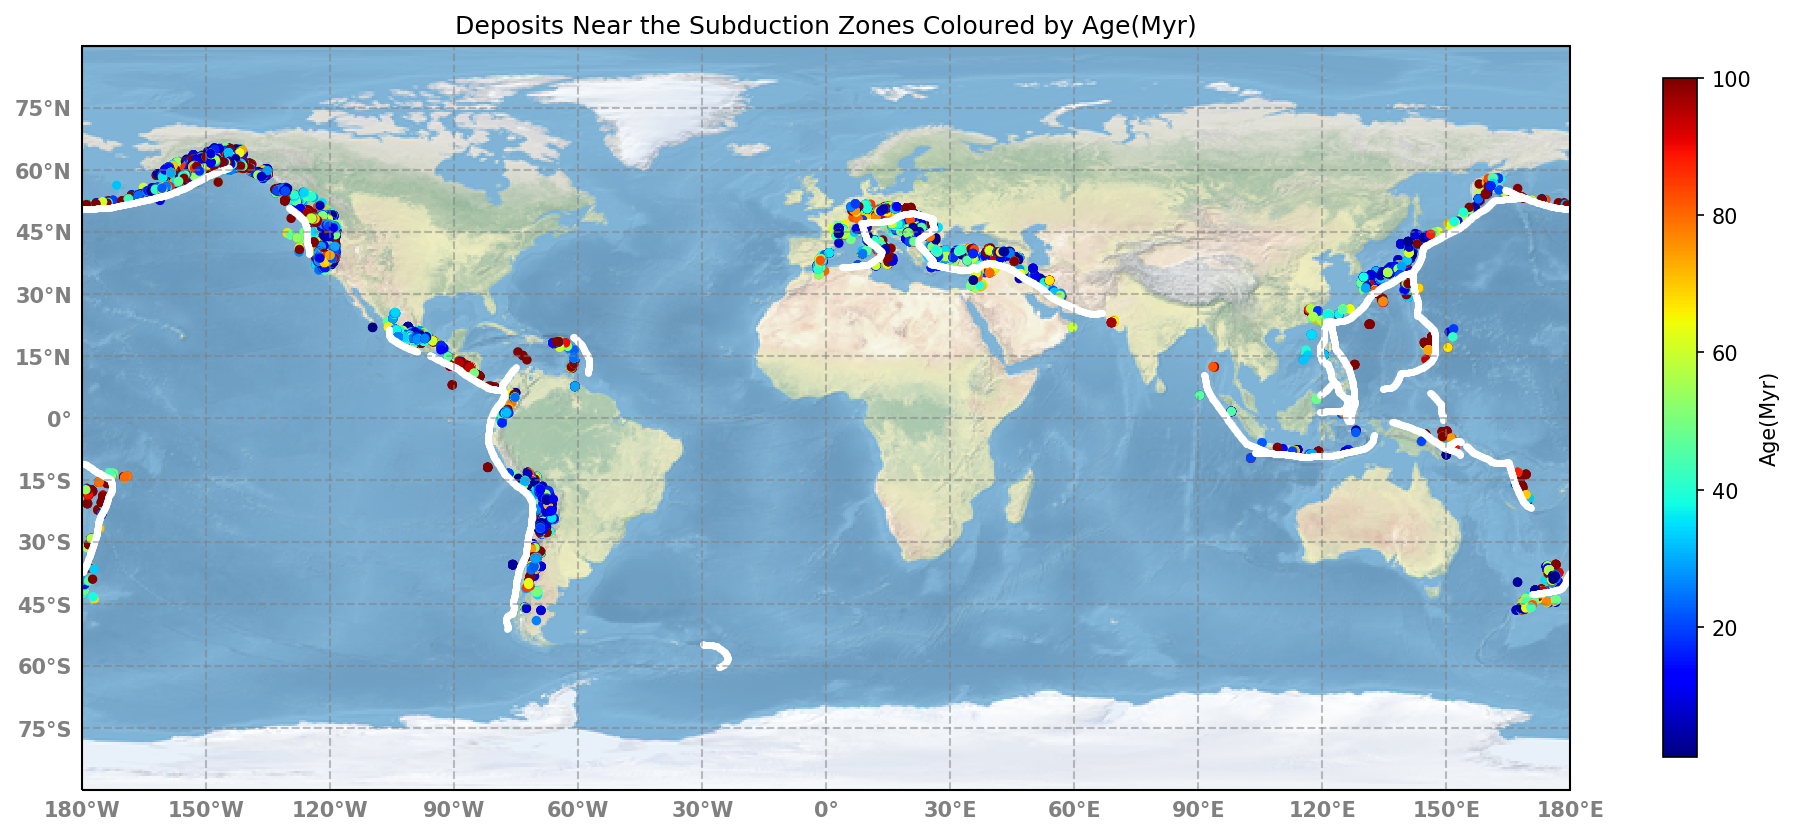

In [67]:
#plot the data    
fig = plt.figure(figsize=(16,12),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl.ylocator = mticker.FixedLocator([-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'color': 'gray', 'weight': 'bold'}

ax.stock_img()
ax.set_extent([-180, 180, -90, 90])
cb = ax.scatter(data[:,1], data[:,0], 50, marker='.',c=data[:,3], vmin=1, vmax=100, cmap=plt.cm.jet)
ax.scatter(trench_data[:,0], trench_data[:,1], 20, marker='.', color='white')
plt.title('Deposits Near the Subduction Zones Coloured by Age(Myr)')
fig.colorbar(cb, shrink=0.5, label='Age(Myr)')
plt.show()

#### Example 3: PorCuEX2008.csv

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import Utils

#read in data
data = pd.read_csv("PorCuEX2008.csv")
trench_data= np.genfromtxt('./convergence_data/subStats_0.00.csv')
print(f'Data shape: {data.shape}')

#select deposits within 5 degrees of trench
indices = Utils.select_points_in_region(data['LongitudeDecimal'], data['LatitudeDecimal'], 
                              trench_data[:,0], trench_data[:,1], 5)#5 degrees
data_near_trench = data[indices]
print(f'Data near trench shape: {data_near_trench.shape}')

#select data within bounding box [-85, -30, -55, 15]
data_south_america = data_near_trench[data_near_trench['LongitudeDecimal']>-85]
data_south_america = data_south_america[data_near_trench['LongitudeDecimal']<-30]
data_south_america = data_south_america[data_near_trench['LatitudeDecimal']>-55]
data_south_america = data_south_america[data_near_trench['LatitudeDecimal']<15]
print(f'Data South America shape: {data_south_america.shape}')

#divide data by Tonnage
tmp = data_south_america.fillna(value={'Tonnage':0})
data_sort_by_Tonnage = tmp.sort_values(by='Tonnage', ascending=False)
#print(data_sort_by_Tonnage['Tonnage'])
data_big_Tonnage = data_sort_by_Tonnage[:int(data_sort_by_Tonnage.shape[0]/2)]
data_small_Tonnage = data_sort_by_Tonnage[int(data_sort_by_Tonnage.shape[0]/2):]
print('big Tonnage: \n', data_big_Tonnage['Tonnage'])
print('small Tonnage: \n', data_small_Tonnage['Tonnage'])

Data shape: (690, 43)
Data near trench shape: (394, 43)
Data South America shape: (148, 43)
big Tonnage: 
 163    21277.0
172    20731.0
181    16816.0
173    11158.0
182     7458.0
        ...   
445      155.0
460      141.6
407      134.9
446      114.0
195      110.0
Name: Tonnage, Length: 74, dtype: float64
small Tonnage: 
 277    84.5
439    70.0
267    53.5
455    37.8
430    34.0
       ... 
249     0.0
248     0.0
199     0.0
194     0.0
250     0.0
Name: Tonnage, Length: 74, dtype: float64


/home/mchin/anaconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/mchin/anaconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/mchin/anaconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


##### Plot the data in a global map

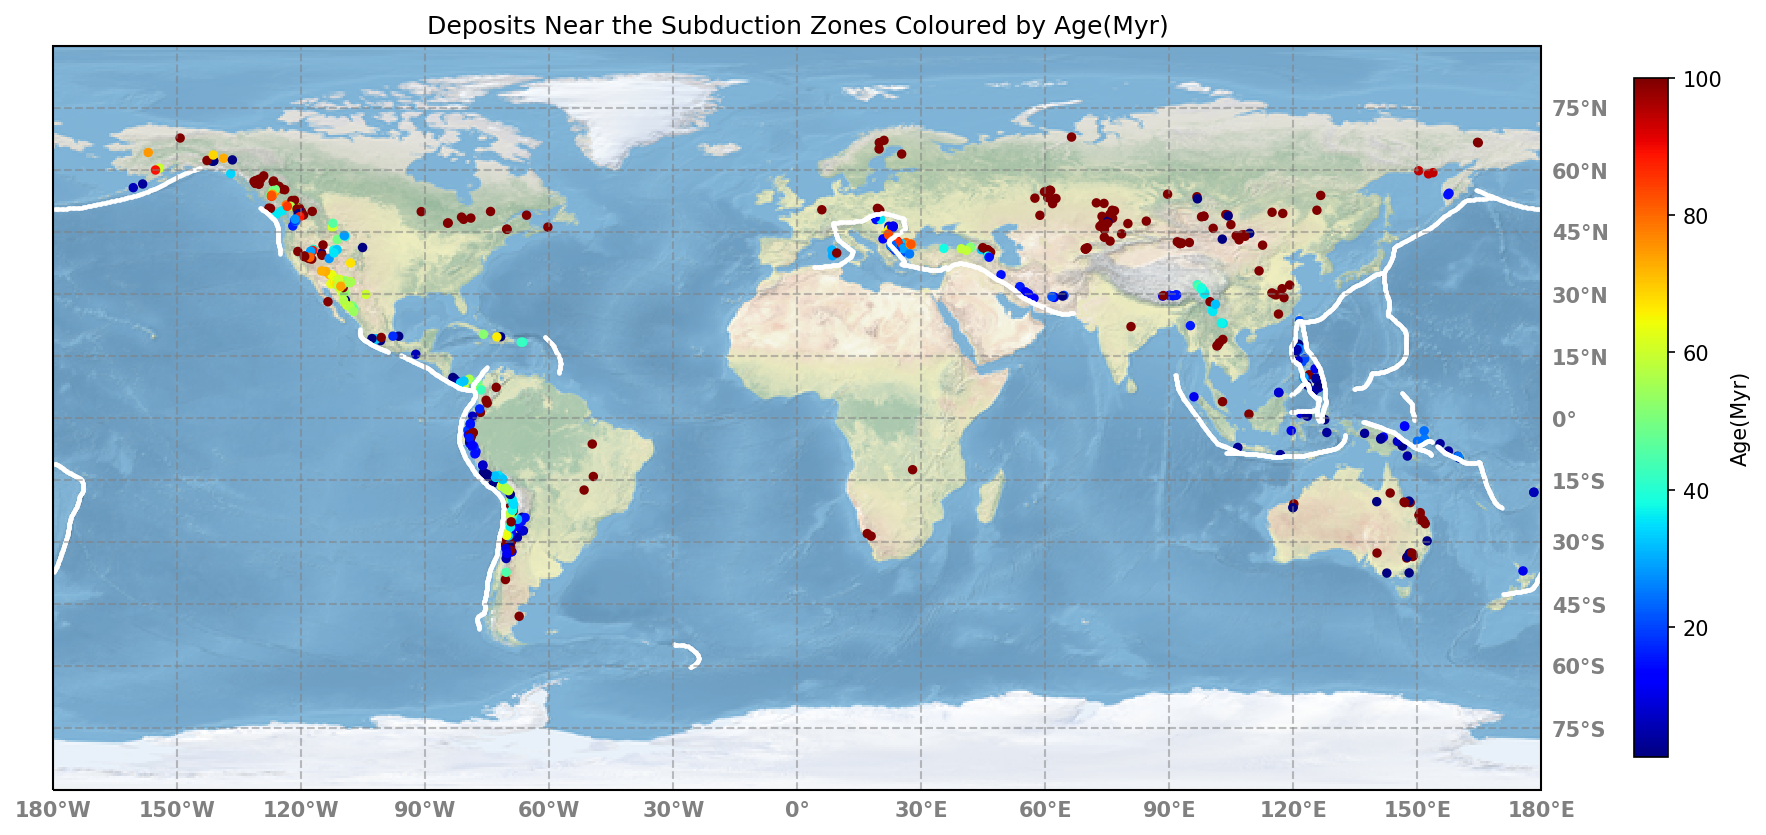

In [69]:
#*******************************************

#LOOK HERE!!
#you may choose the data to plot

plot_data = data
#plot_data = data_near_trench
#plot_data = data_south_america
#plot_data = data_big_Tonnage
#plot_data = data_small_Tonnage

#*******************************************


#plot the map
fig = plt.figure(figsize=(16,12),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180])
gl.ylocator = mticker.FixedLocator([-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'color': 'gray', 'weight': 'bold'}

ax.stock_img()
ax.set_extent([-180, 180, -90, 90])
#ax.set_extent([-85, -29, -55, 15])
cb = ax.scatter(plot_data['LongitudeDecimal'], plot_data['LatitudeDecimal'], 50, marker='.',c=plot_data['AgeMY'], 
                vmin=1, vmax=100, cmap=plt.cm.jet)
ax.scatter(trench_data[:,0], trench_data[:,1], 5, marker='.', color='white')
plt.title('Deposits Near the Subduction Zones Coloured by Age(Myr)')
fig.colorbar(cb, shrink=0.5, label='Age(Myr)')
plt.show()

##### Plot a regional map

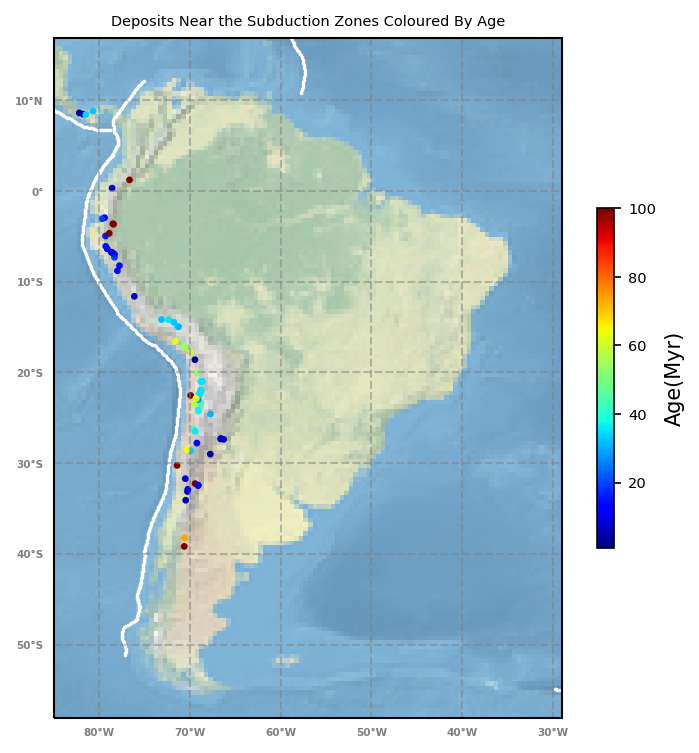

In [70]:
#*******************************************

#LOOK HERE!!
#you may choose the data to plot

#plot_data = data_south_america
plot_data = data_big_Tonnage
#plot_data = data_small_Tonnage

#******************************************

#plot the map
fig = plt.figure(figsize=(6,6),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-85, -29, -55, 15])
#ax.set_extent([-180, 180, -90, 90])
data=data[:155]

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-180, -150, -120, -90, -80, -70, -60,-50,-40,-30, 0, 180])
gl.ylocator = mticker.FixedLocator([-90,-50,-40, -30, -20,-10, 0, 10, 20, 30, 40,50, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'gray', 'weight': 'bold', 'fontsize': '5'}
gl.ylabel_style = {'color': 'gray', 'weight': 'bold', 'fontsize': '5'}

cb = ax.scatter(plot_data['LongitudeDecimal'], plot_data['LatitudeDecimal'], 20, marker='.',
                c=plot_data['AgeMY'], vmin=1, vmax=100, cmap=plt.cm.jet)
ax.scatter(trench_data[:,0], trench_data[:,1], 2, marker='.', color='white')# draw the trench in white
plt.title('Deposits Near the Subduction Zones Coloured By Age',fontsize=7)
cbar = fig.colorbar(cb, shrink=0.5)
cbar.set_label('Age(Myr)',size=10)
cbar.ax.tick_params(labelsize=7)
plt.show()

#### This is the end of step 2 and now open the step 3 notebook
[3_Coregistration.ipynb](3_Coregistration.ipynb)